In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
from sklearn.datasets import fetch_openml

In [17]:
x,y = fetch_openml('mnist_784' , version = 1 , return_X_y = True)

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.85)

In [34]:
xtrain = xtrain / 255.
xtest = xtest / 255.

In [42]:
xtrain_np = xtrain.to_numpy() 

In [45]:
xtrain_img = xtrain_np.reshape(len(xtrain_np),28,28)
xtrain_img[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

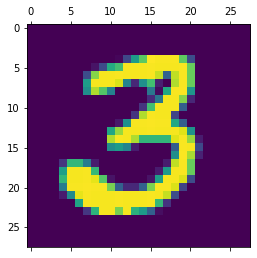

In [47]:
plt.matshow(xtrain_img[10]);